[handson-ml2](https://github.com/ageron/handson-ml2)
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

$$
\mbox{Ensemble}
    \left\{
        \begin{array}{llll}
        \mbox{use different algs}\\
        \quad\quad\mbox{(Voting)}\\
        \mbox{use same algs}
            \left\{
                \begin{array}{llll}
                \mbox{use random training set}
                    \left\{
                        \begin{array}{llll}
                        \mbox{use random samples with replacement}\\
                        \quad\quad\mbox{(Bagging)}\\
                        \mbox{use random samples without replacement}\\
                        \quad\quad\mbox{(Pasting)}\\
                        \end{array}
                    \right.\\
                \mbox{use random features}\\
                \quad\quad\mbox{(Random Forest)}\\
                \end{array}
            \right.
        \end{array}
    \right.
$$

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

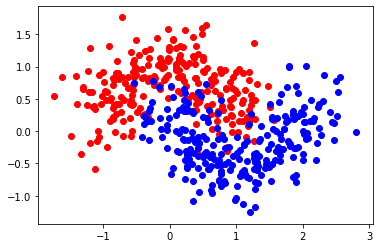

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X[y==0][:,0], X[y==0][:,1], c='r')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='b')
plt.show()

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

tic = time.time()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, 
    bootstrap=True, # bagging (default: bootstrap=True)
    # bootstrap=False, # pasting
    n_jobs=1, # -1 means using all processors 
    random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
toc = time.time()
print('Computing time with n_jobs=1 : {}'.format(toc-tic))

tic = time.time()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, 
    bootstrap=True, # bagging (default: bootstrap=True)
    # bootstrap=False, # pasting
    n_jobs=-1, # -1 means using all processors 
    random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
toc = time.time()
print('Computing time with n_jobs=-1 : {}'.format(toc-tic))

0.856
0.904
Computing time with n_jobs=1 : 0.40891003608703613
0.904
Computing time with n_jobs=-1 : 2.0400187969207764


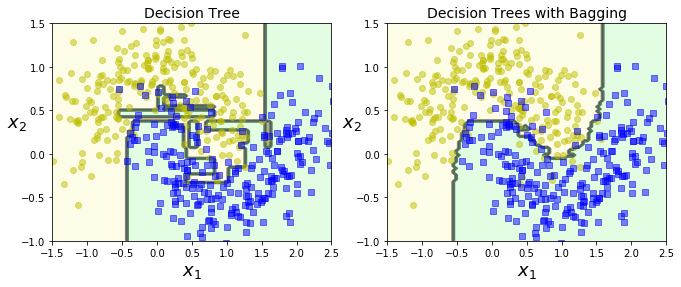

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

plt.savefig("decision_tree_without_and_with_bagging_plot.png")

In [6]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print(np.sum(y_pred == y_pred_rf) / len(y_pred))

0.976


In [25]:
import time
from data_loading.fashion_mnist_flat_loader import data_loading
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, y_train, y_train_cls, X_test, y_test, y_test_cls, cls_names = data_loading()

tic = time.time()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=10000, 
    bootstrap=True, # bagging (default: bootstrap=True)
    # bootstrap=False, # pasting
    n_jobs=-1, # -1 means using all processors 
    random_state=42)
bag_clf.fit(X_train, y_train_cls)
temp = 0
for i in range(100):
    y_pred = bag_clf.predict(X_test[i*100:(i+1)*100])
    temp += accuracy_score(y_test_cls[i*100:(i+1)*100], y_pred)
print('Bagging Score : {}'.format(temp/100))
# y_pred = bag_clf.predict(X_test) # ValueError: buffer source array is read-only
# print(accuracy_score(y_test_cls, y_pred)) # ValueError: buffer source array is read-only
toc = time.time()
print('Computing time with Bagging : {}'.format(toc-tic))

tic = time.time()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train_cls)
y_pred_rf = rnd_clf.predict(X_test)
print('Random Forest Score : {}'.format(accuracy_score(y_test_cls, y_pred_rf)))
toc = time.time()
print('Computing time with Random Forest : {}'.format(toc-tic))

Bagging Score : 0.8634999999999995
Computing time with Bagging : 804.6788609027863
Random Forest Score : 0.8279
Computing time with Random Forest : 36.84042501449585


In [1]:
import time
from data_loading import fashion_mnist_flat_loader as mnist_flat
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, y_train, y_train_cls, X_test, y_test, y_test_cls, cls_names = mnist_flat.data_loading()

tic = time.time()
bag_clf = BaggingClassifier(
    RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, n_jobs=-1, random_state=42), 
    n_estimators=10,
    max_samples=10000, 
    bootstrap=True, # bagging (default: bootstrap=True)
    # bootstrap=False, # pasting
    n_jobs=-1, # -1 means using all processors 
    random_state=42)
bag_clf.fit(X_train, y_train_cls)
temp = 0
for i in range(100):
    y_pred = bag_clf.predict(X_test[i*100:(i+1)*100])
    temp += accuracy_score(y_test_cls[i*100:(i+1)*100], y_pred)
print('Bagging Score : {}'.format(temp/100))
# y_pred = bag_clf.predict(X_test) # ValueError: buffer source array is read-only
# print(accuracy_score(y_test_cls, y_pred)) # ValueError: buffer source array is read-only
toc = time.time()
print('Computing time with Bagging + Random Forest : {}'.format(toc-tic))

/Users/sungchul/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Bagging Score : 0.8264999999999999
Computing time with Bagging + Random Forest : 311.5545792579651
